In [19]:
import random
import math
import numpy as np
import random
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals as  alg
from qiskit.circuit.library import RealAmplitudes,ZZFeatureMap
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor,VQR
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.algorithms.optimizers import L_BFGS_B
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
np.random.seed(20)
weight = 0.7
bias = 0.3
num_samples = 40
X = np.random.randint(1,100,40)
y = np.random.randint(1,100,40)

In [21]:
 assert X.shape == y.shape

In [22]:
#X =max(X)/X

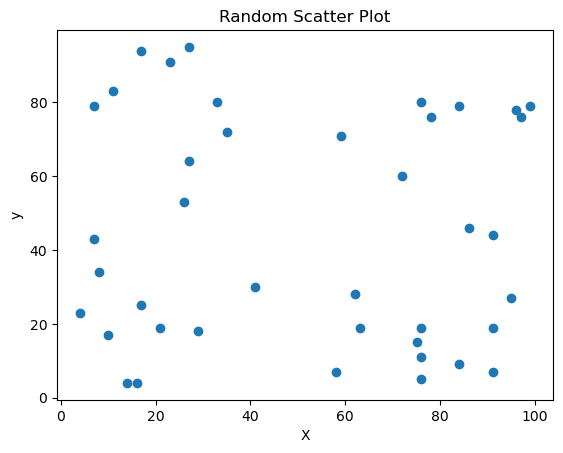

In [23]:
plt.scatter(X,y)
plt.title('Random Scatter Plot')
plt.xlabel ('X')
plt.ylabel('y')
plt.show()

In [24]:
X_net = X.reshape(-1,1)
y_net = y.reshape(-1,1)
X_net.shape

(40, 1)

# QUANTUM CIRCUIT 

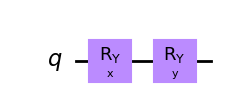

In [25]:
independent = Parameter("x")
feature_map = QuantumCircuit(1,name='fm')
feature_map.ry(independent,0)
dependent = Parameter("y")
ansatz = QuantumCircuit(1,name="ansatz")
ansatz.ry(dependent,0)
qc = QuantumCircuit(1)
qc.compose(feature_map,inplace=True)
qc.compose(ansatz,inplace=True)
qc.draw("mpl")

# Quantum Regression 

In [26]:
estimator_regressor = EstimatorQNN(circuit=qc,input_params=feature_map.parameters,weight_params=ansatz.parameters)

In [27]:
# Creating a Neural Network Regressor
regressor = NeuralNetworkRegressor(neural_network=estimator_regressor,loss="squared_error",optimizer=L_BFGS_B(maxiter=5))

In [28]:
regressor.fit(X_net,y_net)

In [29]:
predictions = regressor.predict(X_net)

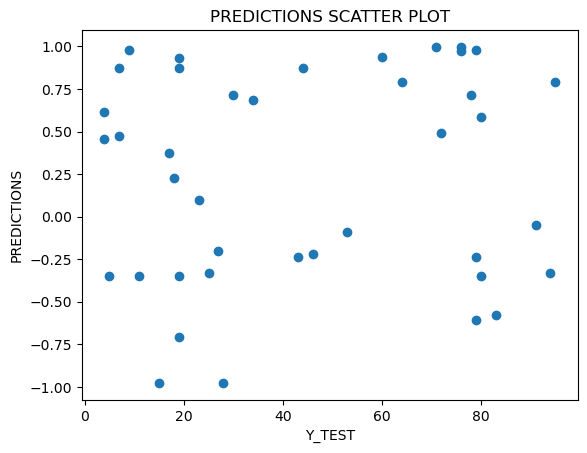

In [30]:
plt.scatter(y.reshape(-1,1),predictions)
plt.xlabel("Y_TEST")
plt.ylabel("PREDICTIONS")
plt.title("PREDICTIONS SCATTER PLOT")
plt.show()

In [31]:
regressor.weights

array([-2.52845594])

# VARIATION QUANTUM REGRESSOR

In [37]:
vqr = VQR(feature_map=feature_map,ansatz= ansatz,optimizer=L_BFGS_B(maxiter=5))

In [38]:
vqr.fit(X_net[:20],y_net[:20])

In [39]:
v_predictions = vqr.predict(y_net[20:])

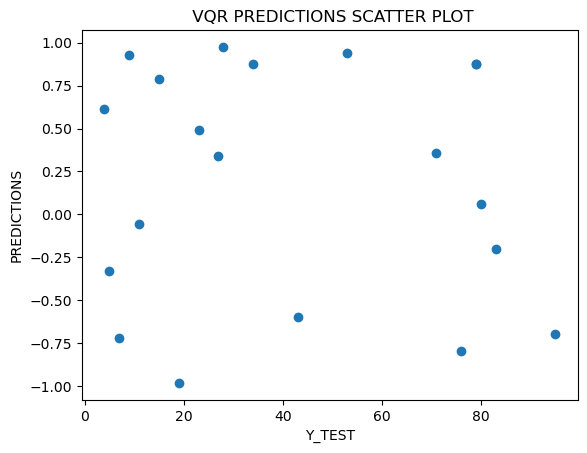

In [41]:
plt.scatter(y[20:].reshape(-1,1),v_predictions)
plt.xlabel("Y_TEST")
plt.ylabel("PREDICTIONS")
plt.title(" VQR PREDICTIONS SCATTER PLOT")
plt.show()

In [36]:
vqr.weights

array([-2.52845138])